In [40]:
import warnings
from typing import Any, Dict, Tuple

import matplotlib.pyplot as plt
from torchmeta.datasets.helpers import omniglot
from torchmeta.utils.data import BatchMetaDataLoader

warnings.filterwarnings(action="ignore")

In [41]:
def get_dataloader(
    config: Dict[str, Any]
) -> Tuple[BatchMetaDataLoader, BatchMetaDataLoader, BatchMetaDataLoader]:
    train_dataset = omniglot(
        folder=config["folder_name"],
        shots=config["num_shots"],
        # test_shots=1, # default = shots
        ways=config["num_ways"],
        shuffle=True,
        meta_train=True,
        download=config["download"],
    )
    train_dataloader = BatchMetaDataLoader(
        train_dataset, batch_size=config["batch_size"], shuffle=True, num_workers=1
    )

    val_dataset = omniglot(
        folder=config["folder_name"],
        shots=config["num_shots"],
        # test_shots=1, # default = shots
        ways=config["num_ways"],
        shuffle=True,
        meta_val=True,
        download=config["download"],
    )
    val_dataloader = BatchMetaDataLoader(
        val_dataset, batch_size=config["batch_size"], shuffle=True, num_workers=1
    )

    test_dataset = omniglot(
        folder=config["folder_name"],
        shots=config["num_shots"],
        # test_shots=1, # default = shots
        ways=config["num_ways"],
        shuffle=True,
        meta_test=True,
        download=config["download"],
    )
    test_dataloader = BatchMetaDataLoader(
        test_dataset, batch_size=config["batch_size"], shuffle=True, num_workers=1
    )

    return train_dataloader, val_dataloader, test_dataloader

In [42]:
config = {
    "folder_name": "dataset",
    "download": True,
    "num_shots": 2,
    "num_ways": 5,
    "batch_size": 3,
    "num_batches_train": 6000,
    "num_batches_test": 2000,
    "num_batches_val": 100,
    "device": "cpu",  # "cuda" or "cpu"
}

train_dataloader, val_dataloader, test_dataloader = get_dataloader(config)

In [43]:
for batch_idx, batch in enumerate(train_dataloader):
    for k, v in batch.items():
        print("key:", k)
        print("type(v):", type(v))
        print("len(v):", len(v))
        print("v[0].shape:", v[0].shape)
        print("v[1].shape:", v[1].shape)
    break

key: train
type(v): <class 'list'>
len(v): 2
v[0].shape: torch.Size([3, 10, 1, 28, 28])
v[1].shape: torch.Size([3, 10])
key: test
type(v): <class 'list'>
len(v): 2
v[0].shape: torch.Size([3, 10, 1, 28, 28])
v[1].shape: torch.Size([3, 10])


/Users/yohan/opt/anaconda3/envs/meta/lib/python3.8/site-packages/torchvision/transforms/functional.py:973: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [44]:
for batch_idx, batch in enumerate(train_dataloader):
    for k, v in batch.items():
        print(k)
        print(v[1])
        print()
    print()
    if batch_idx > 10:
        break

train
tensor([[4, 4, 2, 2, 1, 1, 3, 3, 0, 0],
        [4, 4, 2, 2, 3, 3, 1, 1, 0, 0],
        [0, 0, 2, 2, 4, 4, 1, 1, 3, 3]])

test
tensor([[4, 4, 2, 2, 1, 1, 3, 3, 0, 0],
        [4, 4, 2, 2, 3, 3, 1, 1, 0, 0],
        [0, 0, 2, 2, 4, 4, 1, 1, 3, 3]])


train
tensor([[3, 3, 1, 1, 4, 4, 2, 2, 0, 0],
        [2, 2, 4, 4, 0, 0, 1, 1, 3, 3],
        [3, 3, 2, 2, 0, 0, 1, 1, 4, 4]])

test
tensor([[3, 3, 1, 1, 4, 4, 2, 2, 0, 0],
        [2, 2, 4, 4, 0, 0, 1, 1, 3, 3],
        [3, 3, 2, 2, 0, 0, 1, 1, 4, 4]])


train
tensor([[4, 4, 1, 1, 3, 3, 2, 2, 0, 0],
        [1, 1, 3, 3, 4, 4, 2, 2, 0, 0],
        [2, 2, 0, 0, 3, 3, 4, 4, 1, 1]])

test
tensor([[4, 4, 1, 1, 3, 3, 2, 2, 0, 0],
        [1, 1, 3, 3, 4, 4, 2, 2, 0, 0],
        [2, 2, 0, 0, 3, 3, 4, 4, 1, 1]])


train
tensor([[3, 3, 2, 2, 0, 0, 4, 4, 1, 1],
        [4, 4, 1, 1, 0, 0, 3, 3, 2, 2],
        [1, 1, 3, 3, 0, 0, 2, 2, 4, 4]])

test
tensor([[3, 3, 2, 2, 0, 0, 4, 4, 1, 1],
        [4, 4, 1, 1, 0, 0, 3, 3, 2, 2],
        [1, 1, 3, 3

/Users/yohan/opt/anaconda3/envs/meta/lib/python3.8/site-packages/torchvision/transforms/functional.py:973: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [45]:
for batch_idx, batch in enumerate(val_dataloader):
    for k, v in batch.items():
        print(k)
        print(v[1])
        print()
    print()
    if batch_idx > 10:
        break

train
tensor([[1, 1, 4, 4, 0, 0, 2, 2, 3, 3],
        [3, 3, 1, 1, 4, 4, 0, 0, 2, 2],
        [2, 2, 1, 1, 0, 0, 3, 3, 4, 4]])

test
tensor([[1, 1, 4, 4, 0, 0, 2, 2, 3, 3],
        [3, 3, 1, 1, 4, 4, 0, 0, 2, 2],
        [2, 2, 1, 1, 0, 0, 3, 3, 4, 4]])


train
tensor([[1, 1, 0, 0, 3, 3, 2, 2, 4, 4],
        [4, 4, 1, 1, 0, 0, 2, 2, 3, 3],
        [0, 0, 3, 3, 1, 1, 4, 4, 2, 2]])

test
tensor([[1, 1, 0, 0, 3, 3, 2, 2, 4, 4],
        [4, 4, 1, 1, 0, 0, 2, 2, 3, 3],
        [0, 0, 3, 3, 1, 1, 4, 4, 2, 2]])


train
tensor([[0, 0, 4, 4, 3, 3, 2, 2, 1, 1],
        [4, 4, 1, 1, 3, 3, 0, 0, 2, 2],
        [0, 0, 3, 3, 1, 1, 4, 4, 2, 2]])

test
tensor([[0, 0, 4, 4, 3, 3, 2, 2, 1, 1],
        [4, 4, 1, 1, 3, 3, 0, 0, 2, 2],
        [0, 0, 3, 3, 1, 1, 4, 4, 2, 2]])


train
tensor([[4, 4, 3, 3, 0, 0, 2, 2, 1, 1],
        [1, 1, 2, 2, 3, 3, 4, 4, 0, 0],
        [4, 4, 3, 3, 1, 1, 0, 0, 2, 2]])

test
tensor([[4, 4, 3, 3, 0, 0, 2, 2, 1, 1],
        [1, 1, 2, 2, 3, 3, 4, 4, 0, 0],
        [4, 4, 3, 3

/Users/yohan/opt/anaconda3/envs/meta/lib/python3.8/site-packages/torchvision/transforms/functional.py:973: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [46]:
for batch_idx, batch in enumerate(test_dataloader):
    for k, v in batch.items():
        print(k)
        print(v[1])
        print()
    print()
    if batch_idx > 10:
        break

train
tensor([[0, 0, 1, 1, 3, 3, 2, 2, 4, 4],
        [2, 2, 1, 1, 3, 3, 0, 0, 4, 4],
        [2, 2, 1, 1, 0, 0, 3, 3, 4, 4]])

test
tensor([[0, 0, 1, 1, 3, 3, 2, 2, 4, 4],
        [2, 2, 1, 1, 3, 3, 0, 0, 4, 4],
        [2, 2, 1, 1, 0, 0, 3, 3, 4, 4]])


train
tensor([[4, 4, 0, 0, 3, 3, 1, 1, 2, 2],
        [2, 2, 4, 4, 3, 3, 0, 0, 1, 1],
        [3, 3, 2, 2, 1, 1, 0, 0, 4, 4]])

test
tensor([[4, 4, 0, 0, 3, 3, 1, 1, 2, 2],
        [2, 2, 4, 4, 3, 3, 0, 0, 1, 1],
        [3, 3, 2, 2, 1, 1, 0, 0, 4, 4]])


train
tensor([[3, 3, 0, 0, 4, 4, 1, 1, 2, 2],
        [4, 4, 2, 2, 1, 1, 0, 0, 3, 3],
        [0, 0, 3, 3, 1, 1, 4, 4, 2, 2]])

test
tensor([[3, 3, 0, 0, 4, 4, 1, 1, 2, 2],
        [4, 4, 2, 2, 1, 1, 0, 0, 3, 3],
        [0, 0, 3, 3, 1, 1, 4, 4, 2, 2]])


train
tensor([[2, 2, 4, 4, 0, 0, 3, 3, 1, 1],
        [3, 3, 4, 4, 2, 2, 0, 0, 1, 1],
        [4, 4, 3, 3, 0, 0, 1, 1, 2, 2]])

test
tensor([[2, 2, 4, 4, 0, 0, 3, 3, 1, 1],
        [3, 3, 4, 4, 2, 2, 0, 0, 1, 1],
        [4, 4, 3, 3

/Users/yohan/opt/anaconda3/envs/meta/lib/python3.8/site-packages/torchvision/transforms/functional.py:973: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [47]:
for batch_idx, batch in enumerate(train_dataloader):
    if batch_idx >= config["num_batches_train"]:
        break

    support_xs = batch["train"][0].to(device=config["device"])
    support_ys = batch["train"][1].to(device=config["device"])
    query_xs = batch["test"][0].to(device=config["device"])
    query_ys = batch["test"][1].to(device=config["device"])

    print(
        f"support_x shape : {support_xs.shape}\n",
        f"support_y shape : {support_ys.shape}\n",
        f"query_x shape   : {query_xs.shape}\n",
        f"query_y shape   : {query_ys.shape}",
    )

    break

support_x shape : torch.Size([3, 10, 1, 28, 28])
 support_y shape : torch.Size([3, 10])
 query_x shape   : torch.Size([3, 10, 1, 28, 28])
 query_y shape   : torch.Size([3, 10])


/Users/yohan/opt/anaconda3/envs/meta/lib/python3.8/site-packages/torchvision/transforms/functional.py:973: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


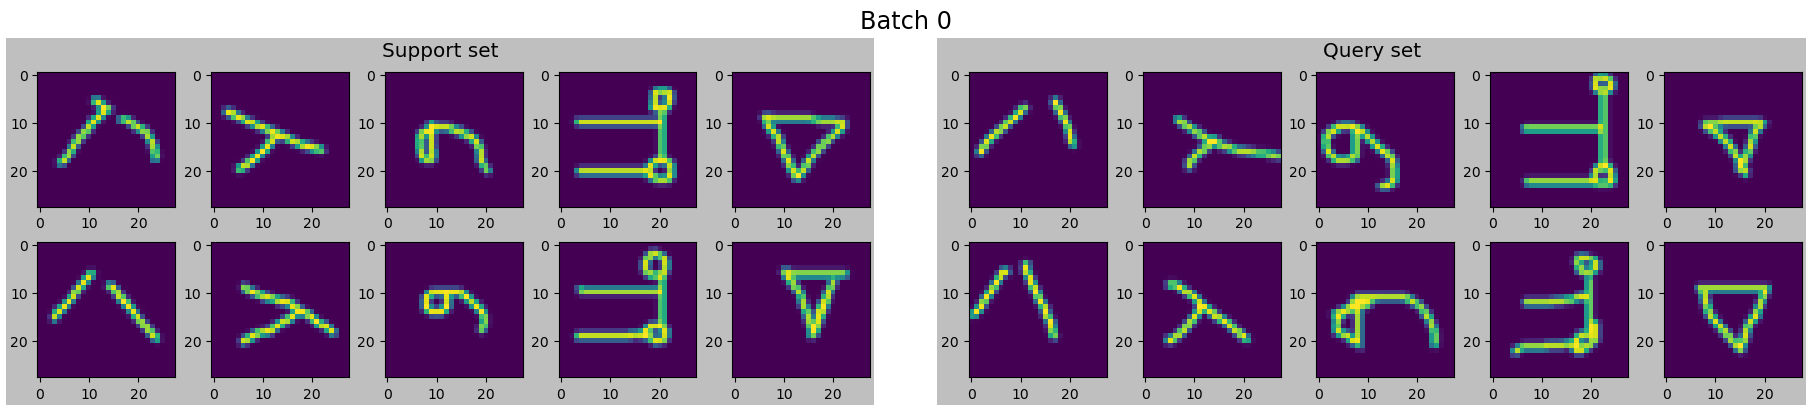

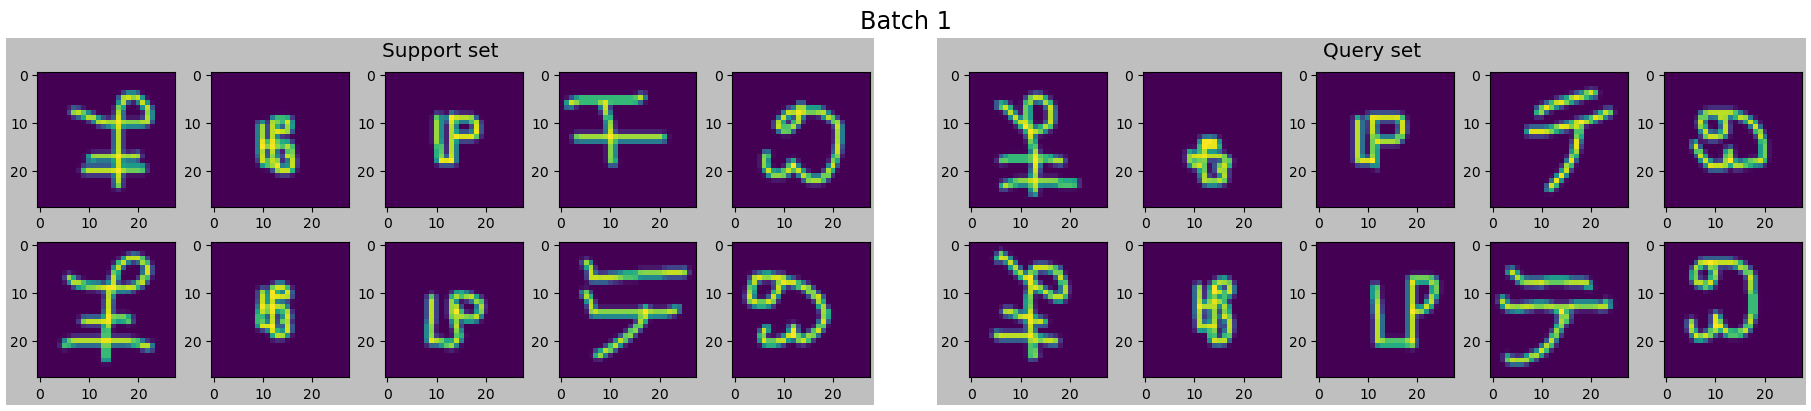

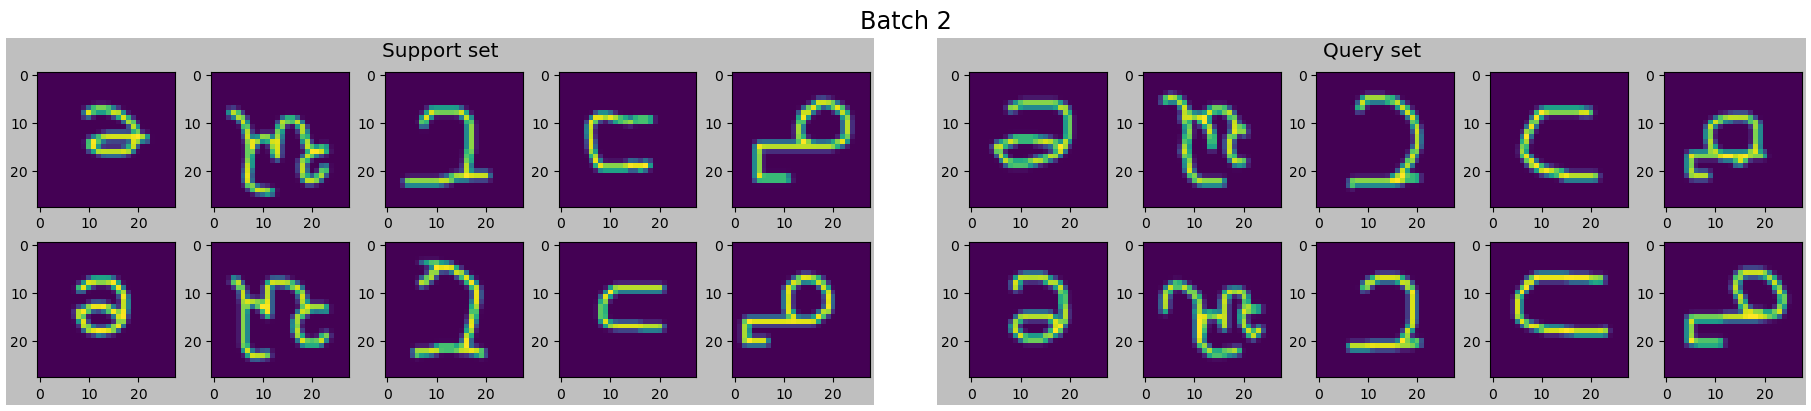

In [48]:
for b in range(config["batch_size"]):
    fig = plt.figure(constrained_layout=True, figsize=(18, 4))
    subfigs = fig.subfigures(1, 2, wspace=0.07)

    subfigs[0].set_facecolor("0.75")
    subfigs[0].suptitle("Support set", fontsize="x-large")
    support_axs = subfigs.flat[0].subplots(nrows=2, ncols=5)
    for i, ax in enumerate(support_axs.T.flatten()):
        ax.imshow(support_xs[b][i].permute(1, 2, 0).squeeze(), aspect="auto")

    subfigs[1].set_facecolor("0.75")
    subfigs[1].suptitle("Query set", fontsize="x-large")
    query_axes = subfigs.flat[1].subplots(nrows=2, ncols=5)
    for i, ax in enumerate(query_axes.T.flatten()):
        ax.imshow(query_xs[b][i].permute(1, 2, 0).squeeze(), aspect="auto")

    fig.suptitle("Batch " + str(b), fontsize="xx-large")

    plt.show()

---